# Classification problem

## Binary classification
Is this declared class or not.

## Multiclass  lassification
Assign element to one of multiple classes.

## Multilabel classification
Assign multiple labels for an element.

## WHat's gonna be covered
* Architecture of classification NN model
* Input/output shapes of classification model (features & labels)
* Creating custom data to view and fit
* Steps in modelling
  * Creating, compiling, fitting, evaluating a model
* Different classification evaluation methods
* Saving & loading models

# Introduction to NN classification with TF

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


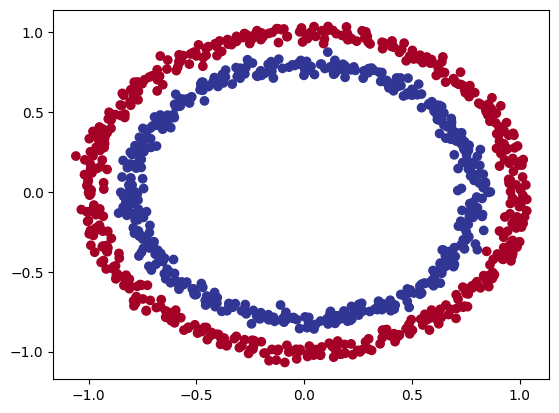

In [6]:
plt.scatter(X[:,0], X[:,1], c=y,cmap=plt.cm.RdYlBu)

## Inspect Input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# view first example of features and labels
X[1], y[1]

(array([-0.75615888,  0.15325888]), np.int64(1))

## Steps in modeling
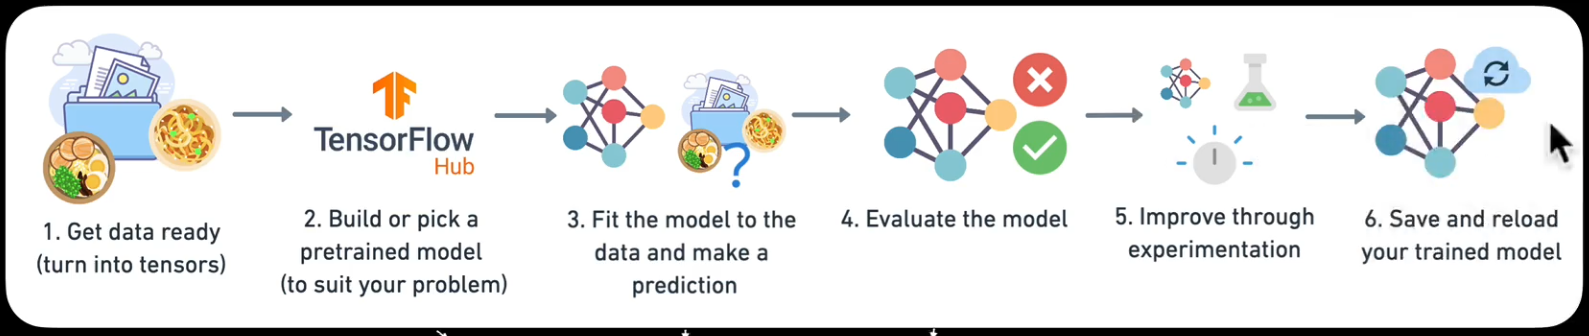

### Prepare train and test sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


### Build or pick model

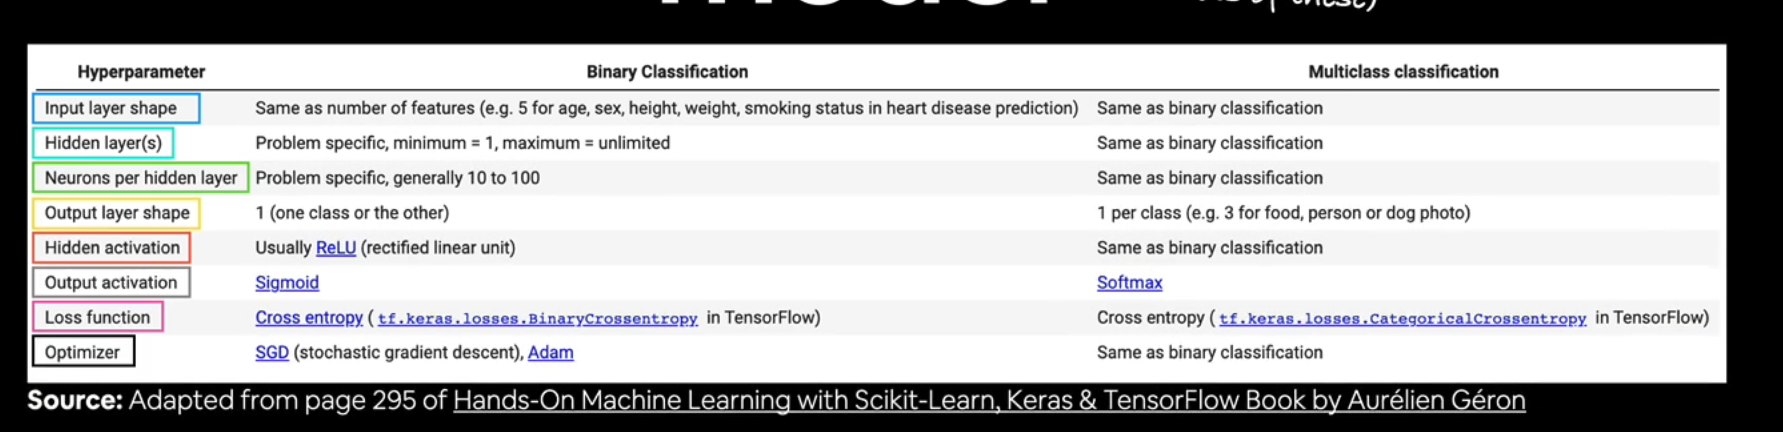

In [55]:
# imports
import keras.models as models
import keras.layers as layers
import keras.optimizers as optimizers
import keras.losses as losses 
import tensorflow as tf
import keras


In [11]:
tf.random.set_seed(42)

classification_model_1 = models.Sequential()
classification_model_1.add(layer=layers.InputLayer(shape=(2,)))
classification_model_1.add(layers.Dense(10, activation="relu"))
classification_model_1.add(layers.Dense(1, activation="sigmoid"))

classification_model_1.compile(optimizers.Adam(), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

2025-07-21 10:40:33.063380: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Model prepared on training movie

In [12]:
tf.random.set_seed(42)

classification_model_2 = models.Sequential()
classification_model_2.add(layers.Dense(1))

classification_model_2.compile(optimizers.SGD(), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

classification_model_2.fit(X_train, y_train, epochs=5)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4700 - loss: 3.6749  
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.4876 - loss: 0.7856
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4886 - loss: 0.7267 
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4921 - loss: 0.7080  
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.5047 - loss: 0.7004


### Improve

Experiment 1:
Train for longer.

In [13]:
tf.random.set_seed(42)

classification_model_3 = models.Sequential()
classification_model_3.add(layers.Dense(1))

classification_model_3.compile(optimizers.SGD(), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

classification_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [14]:
classification_model_3.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4907 - loss: 8.1196 


[7.971192836761475, 0.5]

### Improve 2

Experiment 2: add layer

In [15]:
tf.random.set_seed(42)

classification_model_4 = models.Sequential()
classification_model_4.add(layers.Dense(1))
classification_model_4.add(layers.Dense(1))

classification_model_4.compile(optimizers.SGD(), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

classification_model_4.fit(X_train, y_train, epochs=200, verbose=0)

In [16]:
classification_model_4.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5093 - loss: 7.9090 


[8.05904769897461, 0.5]

### Back to start model

In [17]:
tf.random.set_seed(42)

classification_model_1 = models.Sequential()
classification_model_1.add(layer=layers.InputLayer(shape=(2,)))
classification_model_1.add(layers.Dense(10, activation="relu"))
classification_model_1.add(layers.Dense(1, activation="sigmoid"))

classification_model_1.compile(optimizers.Adam(), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

classification_model_1.fit(X_train, y_train, epochs=200)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4962 - loss: 0.7004  
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5048 - loss: 0.6957  
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5024 - loss: 0.6921 
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5022 - loss: 0.6893  
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.5127 - loss: 0.6870
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.5209 - loss: 0.6850
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.5611 - loss: 0.6833
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5966 - loss: 0.6818  
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5620 - loss: 0.6805  
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.5533 - loss: 0.6794
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.5585 - loss: 0.6783
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s

In [18]:
classification_model_1.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9981 - loss: 0.3401 


[0.3469058573246002, 0.9950000047683716]

In [19]:
X_test[0].shape

(2,)

In [20]:
# Make prediciton on one element from the list

classification_model_1.predict(np.expand_dims(X_test[1], axis=0)), y_test[1] 
# Size of input problem, the batch is first dimension, I had to expand shape of input to cover for batch.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


(array([[0.3843288]], dtype=float32), np.int64(0))

In [21]:
y_pred = classification_model_1.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [22]:
y_test.shape, y_pred.squeeze().shape

((200,), (200,))

#### Using Thresholding (binarization) on predicted values to be able to visualize the data.

In [23]:
y_pred_s = y_pred.squeeze()

threshold = 0.5
threshold_condition = y_pred_s > 0.5
y_pred_final = threshold_condition.astype(int)

#### Visualize the predicted data

In [24]:
y_test != y_pred_final

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [25]:
y_pred_final_add_dif = y_pred_final.copy()
y_pred_final_add_dif[y_test != y_pred_final] = -1
y_pred_final_add_dif

array([ 1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  1,
        0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  0,  0,  1,  1,  0,
        0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  0,
        0,  0,  1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  1,
        1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,
        1,  1,  0,  0,  1,  0,  0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  1,
        0,  1,  0,  0,  1,  1,  0,  1,  1,  0,  1,  1,  0,  1,  0,  0,  0,
        1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  1,  1,  0,  0,  1,  0,  1,  1, -1,  1,  0,  0,  0,  0,  1,
        1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  1,  0,  0,
        0,  1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  1])

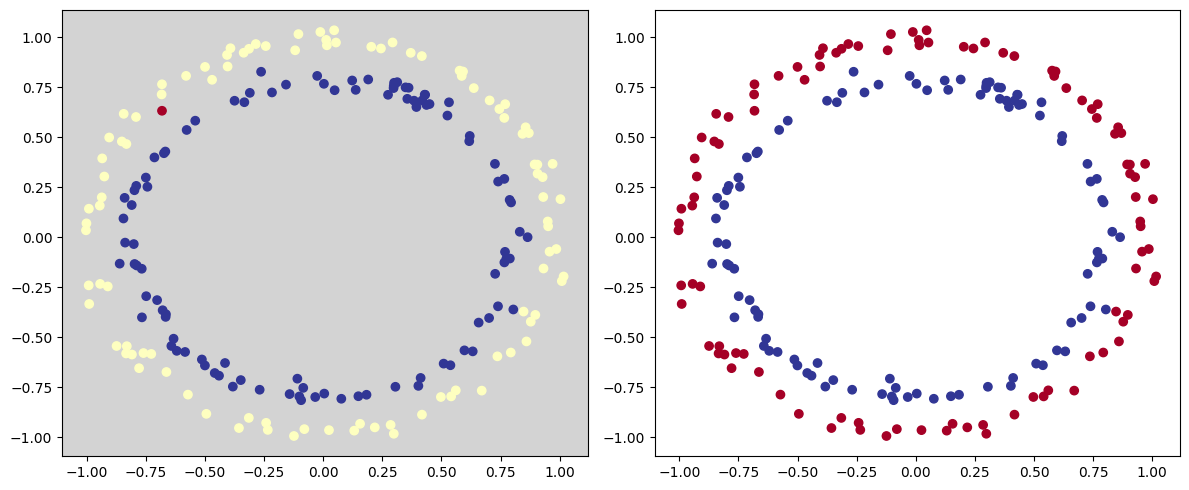

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X_test[:,0], X_test[:,1], c=y_pred_final_add_dif,cmap=plt.cm.RdYlBu)
ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test,cmap=plt.cm.RdYlBu)
ax[0].set_facecolor('lightgrey')
plt.tight_layout()
plt.show()

### plot_decision_boundary() function

In [80]:
def plot_decision_boundary(model, X, y):
    """Plots the decision boundary created by a model predicting on X

    Args:
        model (_type_): _description_
        X (_type_): _description_
        y (_type_): _description_
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print("doing multi-class classification")
        # reshape pred to get the ready
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    # plt.figure(figsize=(12,9))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
doing binary classification


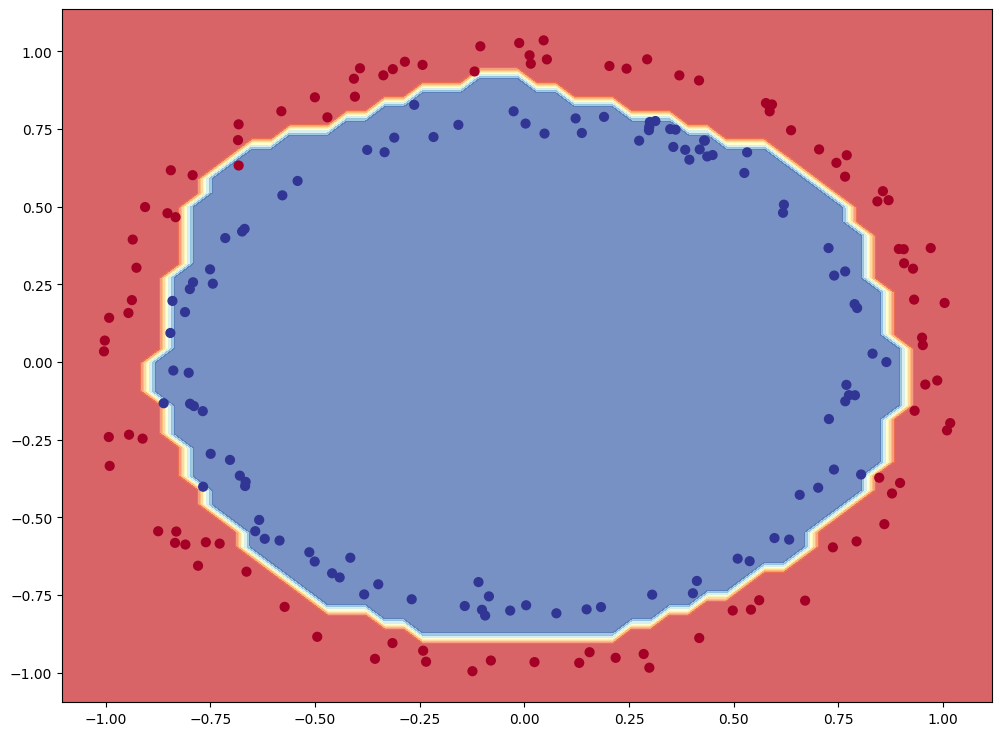

In [28]:
plot_decision_boundary(classification_model_1, X_test, y_test)

In [29]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
xx.shape, yy.shape

((50, 50), (50, 50))

In [30]:
# Test classification_model_4 if can be used as regression

tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [31]:
X_reg_train.shape, y_reg_train.shape

(TensorShape([150]), TensorShape([150]))

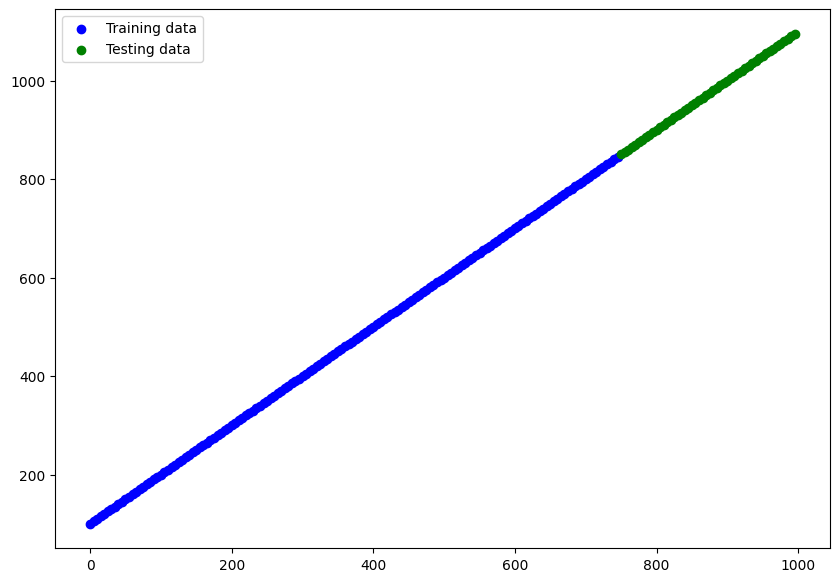

In [33]:
X_reg_train = tf.reshape(X_reg_train, (150,1))
y_reg_train = tf.reshape(y_reg_train, (150,1)) # tf.expand_dims(y_reg_train, axis=-1)


plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing data")
plt.legend(); # ; to not show output of matplotlib

In [34]:
tf.random.set_seed(42)
# this is no longer classification model, it's replica model_3 from tensorflow course, that was missed because of coding everything myself as author asked at the end of previous video
test = models.Sequential()
# test.add(layers.Dense(100))
test.add(layers.Dense(10))
test.add(layers.Dense(1))

test.compile(optimizers.Adam(), loss=losses.MeanSquaredError(), metrics=["mae", "mse"])

test.fit(X_reg_train, y_reg_train, epochs=50)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 621365.5000 - mae: 710.5316 - mse: 621365.5000  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 594196.3750 - mae: 695.2844 - mse: 594196.3750 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 567811.6875 - mae: 680.1390 - mse: 567811.6875  
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 542274.8750 - mae: 665.1401 - mse: 542274.8750  
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 517621.0938 - mae: 650.3197 - mse: 517621.0938  
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 493868.0938 - mae: 635.7017 - mse: 493868.0938 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 471020.0312 - mae: 621.3035 - mse: 471020.0312  
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 449070.4062 - mae: 607.1372 - mse: 449070.4062  
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 428004.2188 - mae: 593.2100 - mse: 428004.2188  
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 

In [35]:
test.evaluate(X_reg_test, y_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 91965.6641 - mae: 302.8272 - mse: 91965.6641


[94168.8984375, 306.39044189453125, 94168.8984375]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


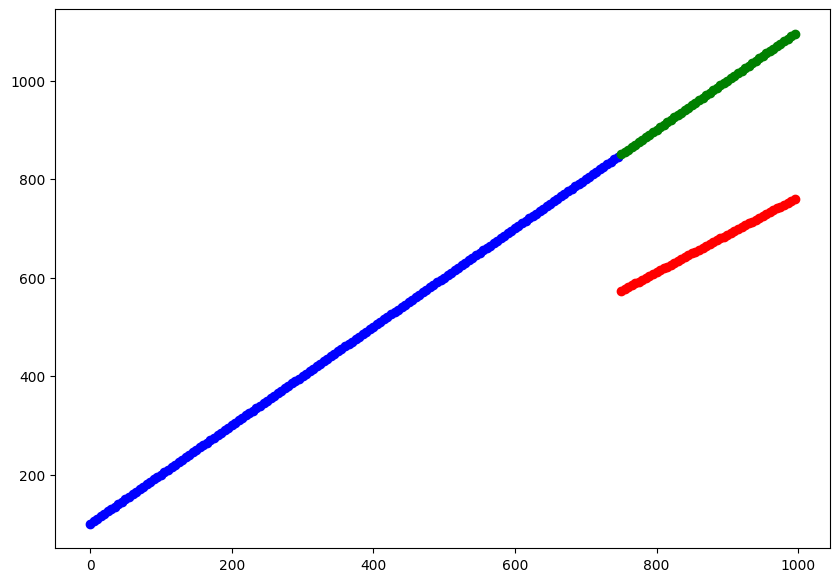

In [36]:
y_reg_pred = test.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b")
plt.scatter(X_reg_test, y_reg_test, c="g")
plt.scatter(X_reg_test, y_reg_pred, c="r")
plt.show()

### Non-linearity

In the course the non-linearity is provided during the video 80, I already provided the sigmoid activation function to the model classification_model_1. This gave me the result before it was explained during the video. The problem in the video was that the guy didn't set the non-linear activation function, so he got in the mesh plot the line shape. It showed that the classification boundary was draw as a straight line through the donuts, not circles that should be expected.



In [39]:
X_train.shape

(800, 2)

In [47]:
# Replicate a model from playground with non-linear ReLU activation

playground_model_1 = models.Sequential()
# playground_model_1.add(layer=layers.InputLayer(shape=(2,)))
playground_model_1.add(layers.Dense(4, activation="relu"))
playground_model_1.add(layers.Dense(4, activation="relu"))
playground_model_1.add(layers.Dense(1, activation="sigmoid"))

playground_model_1.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

playground_model_1.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4934 - loss: 0.6953   
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4835 - loss: 0.6945  
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4707 - loss: 0.6940 
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4736 - loss: 0.6934  
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4923 - loss: 0.6929  
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4899 - loss: 0.6924  
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4937 - loss: 0.6920  
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4917 - loss: 0.6915  
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4947 - loss: 0.6910  
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4958 - loss: 0.6906  
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4973 - loss: 0.6901  
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step
doing binary classification


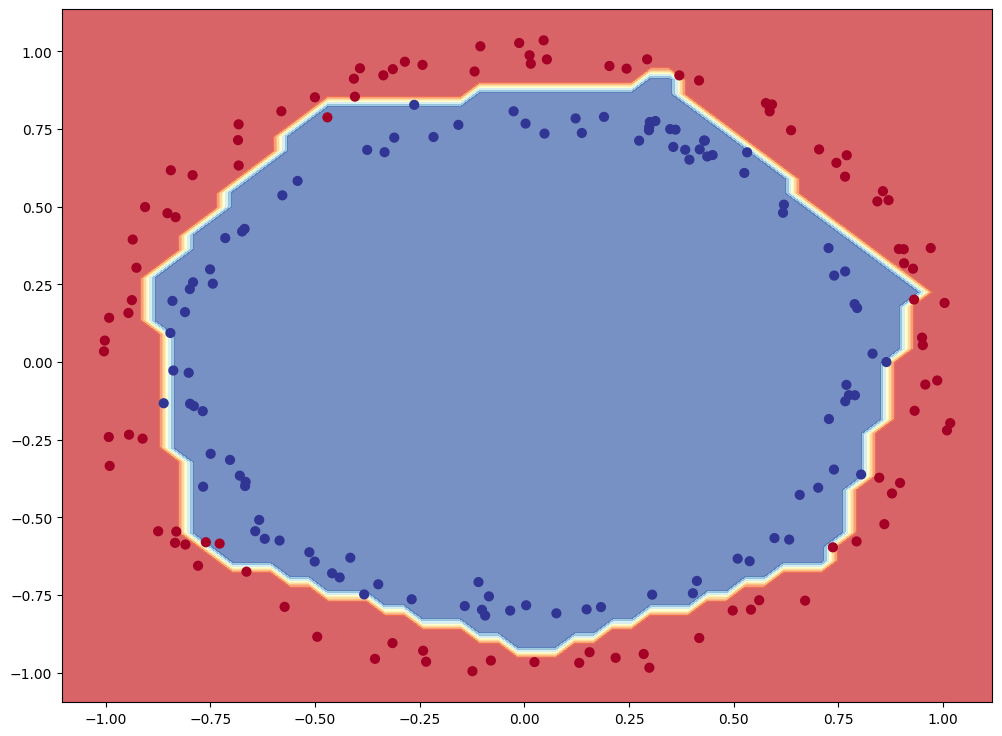

In [48]:
plot_decision_boundary(playground_model_1, X_test, y_test)

#### Important note

During the video the teacher did not split the data for train and test set. Right now he is testing learners if the y caught that up. I already did that, so this part is not related to the work I have done.

### Replication of non-linear activation functions from scratch

In [52]:
A = tf.cast(tf.range(-10, 10), dtype=np.float32)

In [53]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

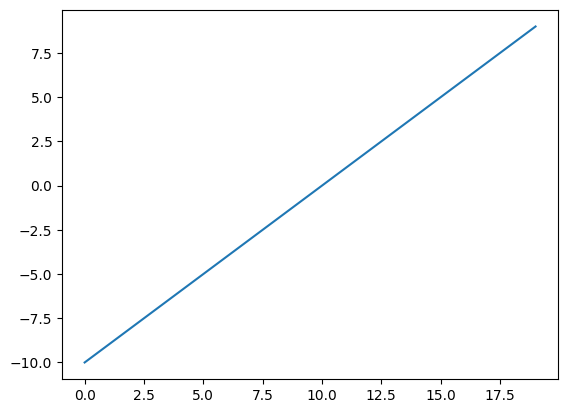

In [54]:
plt.plot(A)

In [58]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))


In [59]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

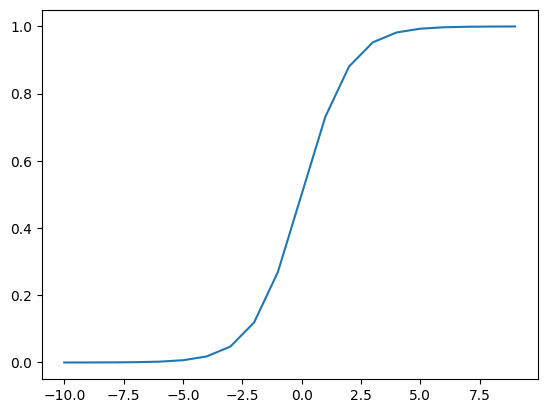

In [64]:
plt.plot(A, sigmoid(A))

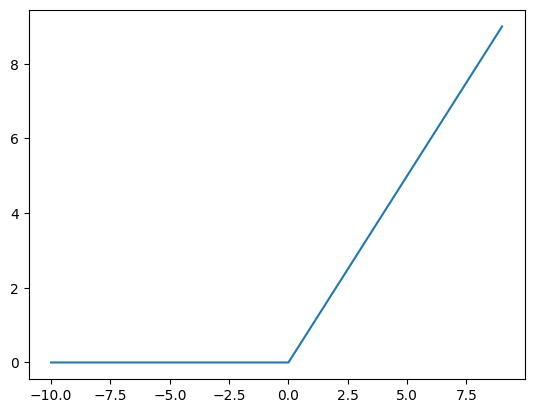

In [63]:
# Replicate ReLU - max(x, 0)

def relu(x):
    return tf.maximum(0, x)

plt.plot(A, relu(A))

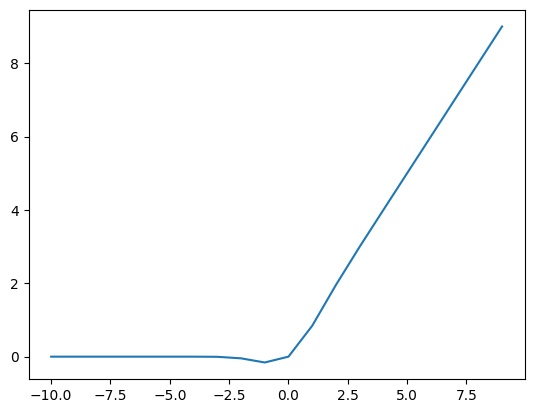

In [69]:
plt.plot(A, keras.activations.gelu(A))
# keras.activations.

### Evaluating and improving classification model

In here the guy is creating the train/test split. I've done that using train_test_split from scikit-learn train_test_split function. The guy is doing that now via indexing.

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [112]:
# Let's recreate the classification model with the train-test split
tf.random.set_seed(42)

classification_model_5 = models.Sequential()
classification_model_5.add(layers.Dense(4, activation="relu"))
classification_model_5.add(layers.Dense(4, activation="relu"))
classification_model_5.add(layers.Dense(1, activation="sigmoid"))

classification_model_5.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

history_clas_model_5 = classification_model_5.fit(X_train, y_train, epochs=50)


Epoch 1/50


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4894 - loss: 0.6901   
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5259 - loss: 0.6861  
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5278 - loss: 0.6831  
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5274 - loss: 0.6805  
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5351 - loss: 0.6773  
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5466 - loss: 0.6740  
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5511 - loss: 0.6687 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6763 - loss: 0.6611 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7290 - loss: 0.6510  
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7662 - loss: 0.6372  
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7688 - loss: 0.6199  
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
doing binary classification
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
doing binary classification


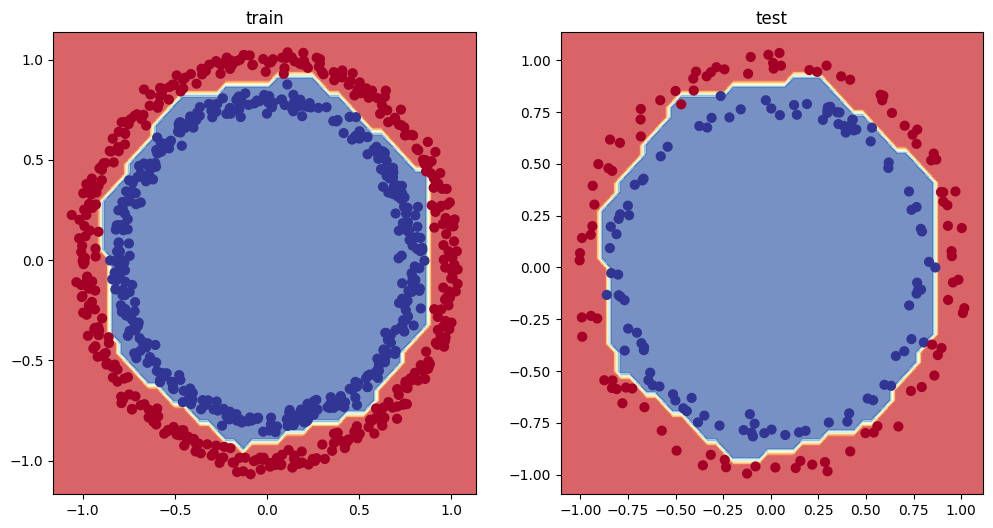

In [83]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(classification_model_5, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(classification_model_5, X_test, y_test)

### Plot loss curves - history variable

<Axes: >

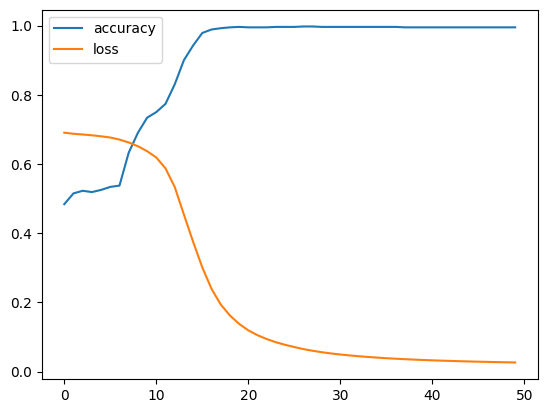

In [132]:
# convert history object into tabular object
history_df = pd.DataFrame(history_clas_model_5.history)
history_df.plot()

# For many problems if loss goes down the model is improving (the predictions are getting closer go Ground Truth)


### Finding the best learning rate

To find the best LR (the one where loss decrease at the best pace during learning) we are going to use following steps:

1. Another model
2. A learning rate **callback** -- extension of functionality you can add to model *while* it's training
3. A modified loss curves plot

In [99]:
# set random seed
tf.random.set_seed(42)

# declare architecture
classification_model_6 = models.Sequential()
classification_model_6.add(layers.Dense(4, activation=keras.activations.relu))
classification_model_6.add(layers.Dense(4, activation=keras.activations.relu))
classification_model_6.add(layers.Dense(1, activation=keras.activations.sigmoid))

# compile the model
classification_model_6.compile(optimizer=optimizers.Adam(), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

# prepare a learning rate callback
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_clas_model_6 = classification_model_6.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5106 - loss: 0.7055 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5087 - loss: 0.7053 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5074 - loss: 0.7050 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5047 - loss: 0.7047 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4975 - loss: 0.7044 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5008 - loss: 0.7040 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5000 - loss: 0.7036 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4976 - loss: 0.7032 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5014 - loss: 0.7028 - learning_

<Axes: xlabel='epochs'>

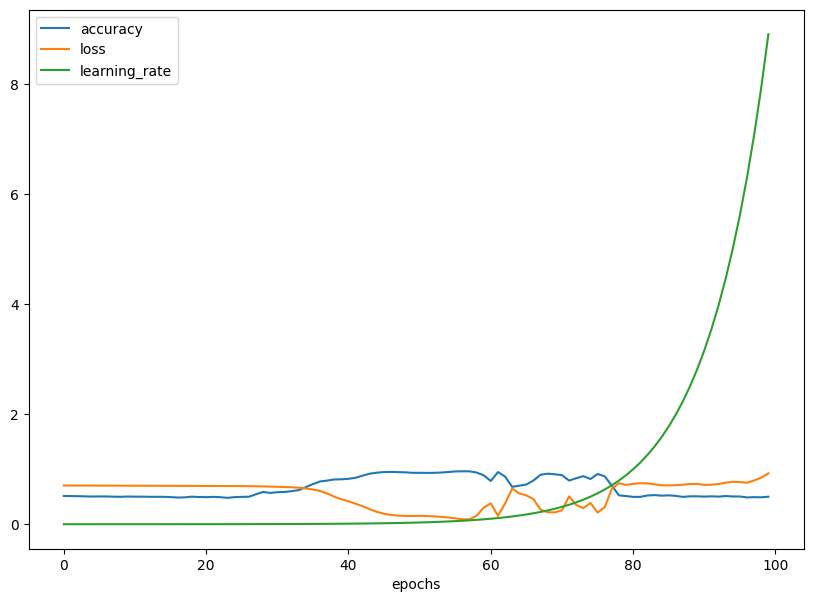

In [101]:
history_clas_model_6_df = pd.DataFrame(history_clas_model_6.history)
history_clas_model_6_df.plot(figsize=(10, 7), xlabel="epochs")

In [105]:
history_clas_model_6_df

,accuracy,loss,learning_rate
0,0.51375,0.704024,0.000100
1,0.51250,0.703783,0.000112
2,0.51000,0.703529,0.000126
3,0.50625,0.703253,0.000141
4,0.50375,0.702955,0.000158
...,...,...,...
95,0.50500,0.766725,5.623413
96,0.48750,0.753502,6.309574
97,0.49250,0.796234,7.079458
98,0.49000,0.847647,7.943282


In [103]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))

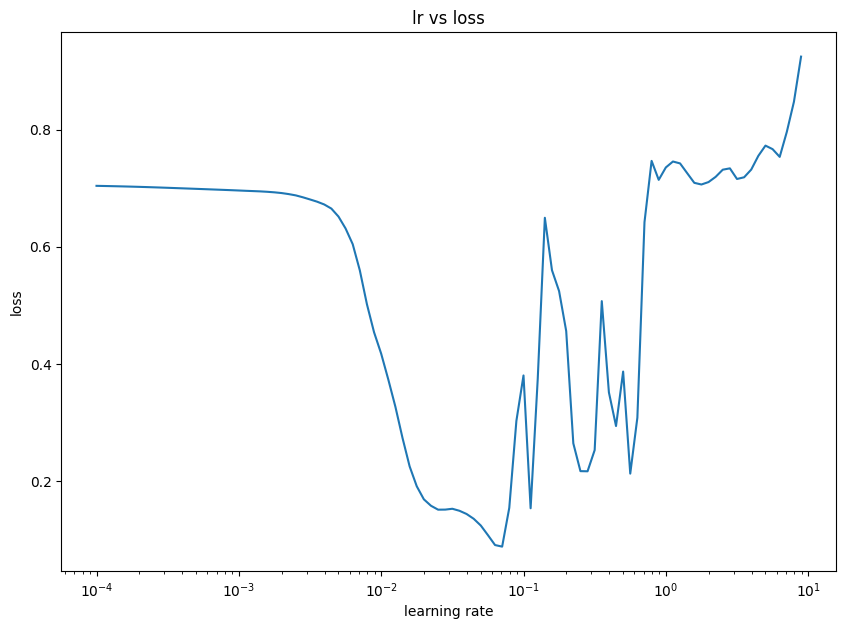

In [108]:
plt.figure(figsize=(10, 7))
plt.semilogx(history_clas_model_6_df.learning_rate, history_clas_model_6_df.loss) # instead of lrs I used learning_rate from df
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("lr vs loss")
plt.show()

#### Finding the best learning rate - my idea

I think that derivative should show me the speed of changes between the LR and Loss. My idea is then to match function loss(learning_rate) to the values and compute derivative, that way I should spot the optimal point where the function is changing the most while going down.

This idea though has some downfalls, because I would need to compute the potential function and the data here are jumping.

So I stay with visual method, just by looking here I Know that the best learning rate is between 1e-2 and 1e-1, my guess is 1e-1.8 ~ 0.01585

Anyway, let's try use adjusted learning rate


In [111]:
# set random seed
tf.random.set_seed(42)

# declare architecture
classification_model_7 = models.Sequential()
classification_model_7.add(layers.Dense(4, activation=keras.activations.relu))
classification_model_7.add(layers.Dense(4, activation=keras.activations.relu))
classification_model_7.add(layers.Dense(1, activation=keras.activations.sigmoid))

# compile the model
classification_model_7.compile(optimizer=optimizers.Adam(learning_rate=0.01585), loss=losses.BinaryCrossentropy(), metrics=["accuracy"])

history_clas_model_7 = classification_model_7.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5173 - loss: 0.6918   
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5329 - loss: 0.6833 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5593 - loss: 0.6703  
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5800 - loss: 0.6505  
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.6516 - loss: 0.6135
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7786 - loss: 0.5524  
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8253 - loss: 0.4836  
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8751 - loss: 0.4235 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8877 - loss: 0.3734  
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9063 - loss: 0.3056  
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9711 - loss: 0.1919  
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

In [113]:
history_clas_model_5_df = pd.DataFrame(history_clas_model_5.history)
history_clas_model_7_df = pd.DataFrame(history_clas_model_7.history)

In [115]:
history_clas_model_5_df, history_clas_model_7_df

(    accuracy      loss
 0    0.48375  0.690481
 1    0.51500  0.687317
 2    0.52250  0.685180
 3    0.51875  0.682976
 4    0.52500  0.680008
 5    0.53375  0.676516
 6    0.53750  0.670565
 7    0.63250  0.662248
 8    0.69000  0.651257
 9    0.73375  0.637023
 10   0.75000  0.618770
 11   0.77375  0.587394
 12   0.83000  0.533727
 13   0.90000  0.453740
 14   0.94250  0.375203
 15   0.97875  0.300917
 16   0.98875  0.239107
 17   0.99250  0.193891
 18   0.99500  0.162000
 19   0.99625  0.137739
 20   0.99500  0.119081
 21   0.99500  0.105000
 22   0.99500  0.093882
 23   0.99625  0.084646
 24   0.99625  0.077156
 25   0.99625  0.070723
 26   0.99750  0.064736
 27   0.99750  0.059939
 28   0.99625  0.055753
 29   0.99625  0.052201
 30   0.99625  0.049153
 31   0.99625  0.046532
 32   0.99625  0.044181
 33   0.99625  0.042101
 34   0.99625  0.040187
 35   0.99625  0.038508
 36   0.99625  0.037015
 37   0.99500  0.035665
 38   0.99500  0.034444
 39   0.99500  0.033336
 40   0.99500  0

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
doing binary classification
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
doing binary classification


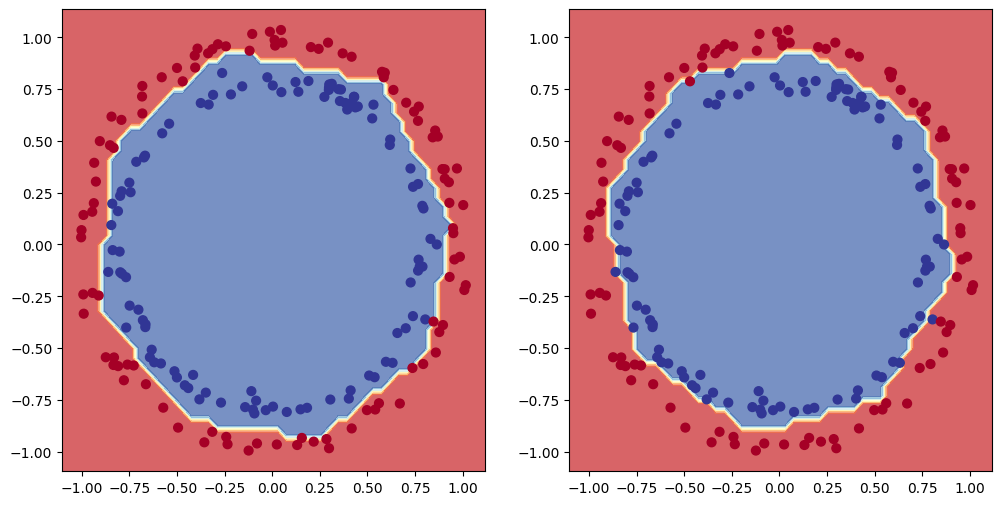

In [117]:
# Compare 2 models

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(classification_model_5, X_test, y_test)
plt.subplot(1,2,2)
plot_decision_boundary(classification_model_7, X_test, y_test)

### Classification evaluation methods

* Accuracy -> not well for imbalanced classes, when one is much larger than the others it can predict that this class is true and for most time it will have right.
* Precision -> Higher precision leads to less FP. 
* Recall -> Higher recall leads to less FN.
<br>
<br>
In ideal case we have both Precision and Recall high, but usually when one is high the other goes down.
<br>
<br>
* F1-score -> combination of precision and recall.
* Confusion matrix
* Classification report -> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

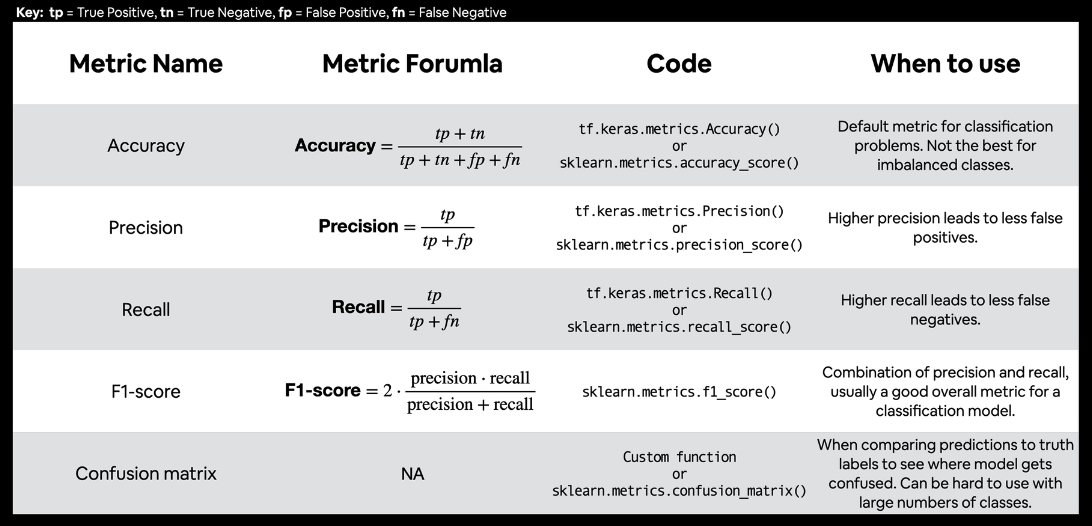

In [120]:
loss, accuracy = classification_model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.0543 
Model loss on the test set: 0.049741510301828384
Model accuracy on the test set: 98.50%


#### How to make confusion matrix
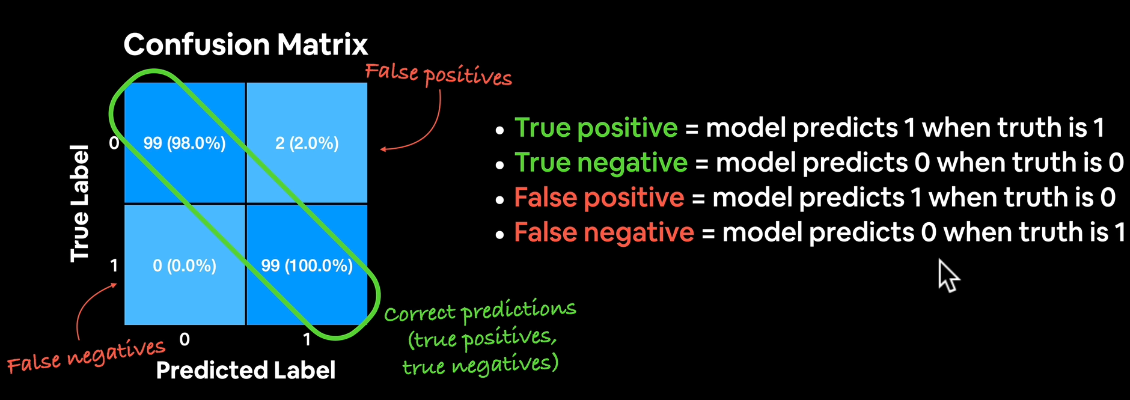

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_cls_model_7 = classification_model_7.predict(X_test)

# confusion_matrix(y_test, y_pred_cls_model_7) problem with preds that are not 0 or 1 they are float because they are prediction probability. 
# I think thresholding might have a use here.
# y_pred_cls_model_7, y_test

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


#### Thresholding again

there is better way than before. Tensorflow offers round function that can round the values as in thresholding.

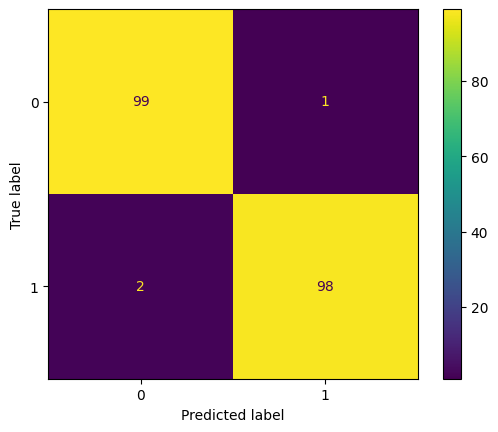

In [130]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # in Bootcamp there is a function to do the plot that I think it's outdated
# confusion_matrix(y_test, tf.round(y_pred_cls_model_7))

# Make the confusion matrix prettier 
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, tf.round(y_pred_cls_model_7)))
disp.plot()

## Working with a larger example

when more than 2 classes it is multiclass classification

### Get the data ready

Fashion company, classify different images of clothing.<br>
To use: fashion_mnist dataset from tensorflow library.

In [25]:
import tensorflow as tf
import keras.models as models
import keras.optimizers as optimizers
import keras.losses as losses
import keras.layers as layers
import keras.activations as activations
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import keras
import pandas as pd

In [3]:
# The data has been already spited into train and test set
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [4]:
print(f"Show training sample: {train_data[0]}")
print(f"Show training label: {train_labels[0]}")

Show training sample: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1 

In [5]:
type(train_data[0]), type(train_labels[0]), train_data[0].shape, train_labels[0].shape

(numpy.ndarray, numpy.uint8, (28, 28), ())

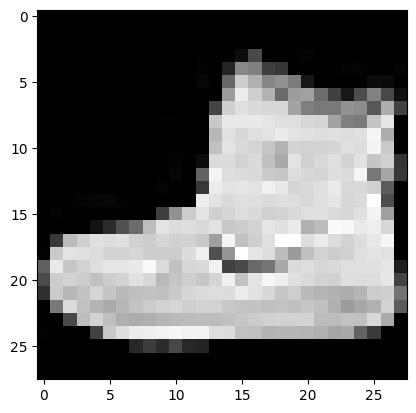

In [6]:
plt.imshow(train_data[0], cmap='gray')

In [7]:
label_names = {0: "T-shirt/topm",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot",}
label_names

{0: 'T-shirt/topm',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

Text(0.5, 1.0, 'T-shirt/topm')

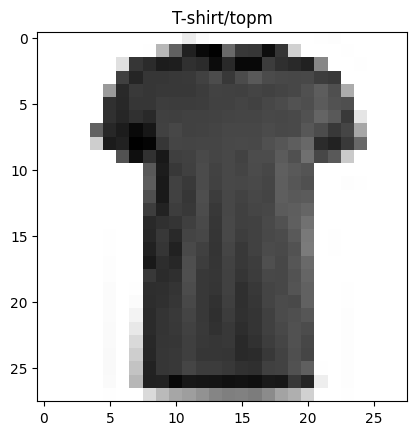

In [8]:
index_of_choince = 17
plt.imshow(train_data[index_of_choince], cmap=plt.cm.binary)
plt.title(label_names[train_labels[index_of_choince]])

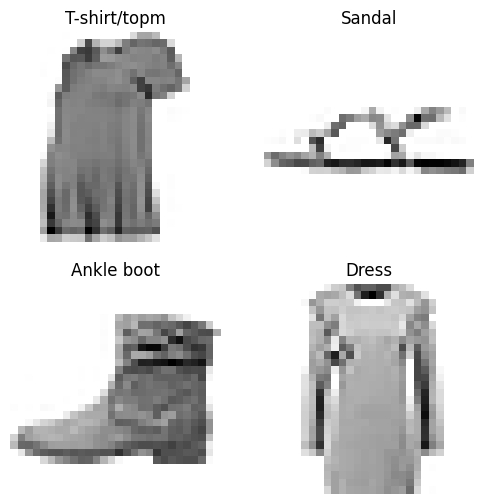

In [9]:
# plot multiple random images of fashion MNIST

import random
plt.figure(figsize=(6,6))
for i in range(4):
    ax = plt.subplot(2,2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(label_names[train_labels[rand_index]])
    plt.axis(False)

### Build model

* input data 28x28 image
* output data 10 classes
* loss function CategoricalCrossentropy
    * if labels are one-hot encoded use CategoricalCrossentropy
    * if labels are integers use SparseCategoricalCrossentropy
* we will use softmax on output layer


In [13]:
tf.random.set_seed(42)

classification_model_8 = models.Sequential()
classification_model_8.add(layers.Flatten(input_shape=(28, 28)))
classification_model_8.add(layers.Dense(4, activation="relu"))
classification_model_8.add(layers.Dense(4, activation="relu"))
classification_model_8.add(layers.Dense(10, activation=activations.softmax))

# note losses.CategoricalCrossentropy() won't work here, it works with one-hot encoding for classes but not for integers as classes
# in this case use losses.SparseCategoricalCrossentropy()
classification_model_8.compile(optimizer=optimizers.Adam(), loss=losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

history_clas_model_8 = classification_model_8.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.1600 - loss: 2.6005 - val_accuracy: 0.3055 - val_loss: 1.7740
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.3144 - loss: 1.7236 - val_accuracy: 0.3534 - val_loss: 1.5926
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.3493 - loss: 1.5806 - val_accuracy: 0.3608 - val_loss: 1.5451
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.3540 - loss: 1.5440 - val_accuracy: 0.3601 - val_loss: 1.5539
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.3614 - loss: 1.5149 - val_accuracy: 0.3699 - val_loss: 1.5237
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.3609 - loss: 1.5090 - val_accuracy: 0.3710 - val_loss: 1.5366
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.3615 - loss: 1.5010 - val_accuracy: 0.3679 - val_loss: 1.5104
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.3660 -

In [14]:
# Check the model summary
classification_model_8.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [17]:
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

### Data normalization

should be done during data preparation i think. NN tend to work better with normalized data, so with float numbers between 0-1

In [18]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [19]:
train_data_norm.min(), train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [20]:
tf.random.set_seed(42)

classification_model_9 = models.Sequential()
classification_model_9.add(layers.Flatten(input_shape=(28, 28)))
classification_model_9.add(layers.Dense(4, activation="relu"))
classification_model_9.add(layers.Dense(4, activation="relu"))
classification_model_9.add(layers.Dense(10, activation=activations.softmax))

# note losses.CategoricalCrossentropy() won't work here, it works with one-hot encoding for classes but not for integers as classes
# in this case use losses.SparseCategoricalCrossentropy()
classification_model_9.compile(optimizer=optimizers.Adam(), loss=losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

history_clas_model_9 = classification_model_9.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))


/home/luxoft/TRAININGS/Tensorflow-Bootcamp/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 931us/step - accuracy: 0.4075 - loss: 1.6598 - val_accuracy: 0.6690 - val_loss: 0.9395
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.7013 - loss: 0.8793 - val_accuracy: 0.7469 - val_loss: 0.7642
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.7521 - loss: 0.7392 - val_accuracy: 0.7649 - val_loss: 0.6986
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.7668 - loss: 0.6884 - val_accuracy: 0.7724 - val_loss: 0.6721
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.7743 - loss: 0.6647 - val_accuracy: 0.7773 - val_loss: 0.6583
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.7786 - loss: 0.6504 - val_accuracy: 0.7795 - val_loss: 0.6504
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.7817 - loss: 0.6403 - val_accuracy: 0.7813 - val_loss: 0.6451
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.7836 -

<Axes: title={'center': 'Normalized data'}>

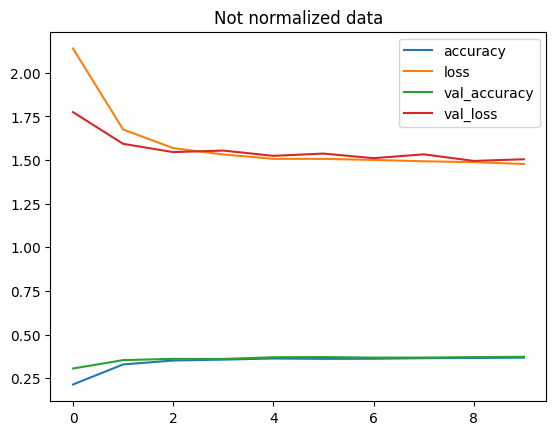

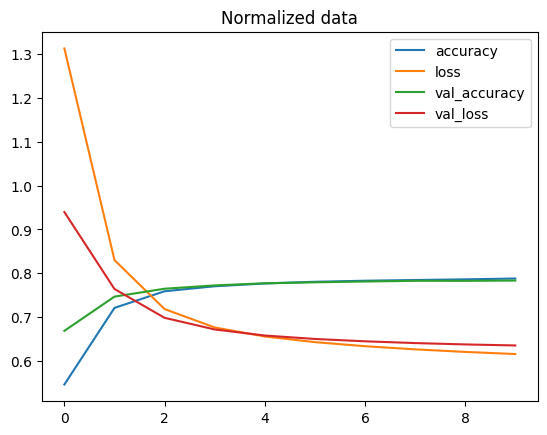

In [23]:
history_clas_model_8_df = pd.DataFrame(history_clas_model_8.history)
history_clas_model_8_df.plot(title="Not normalized data")

history_clas_model_9_df = pd.DataFrame(history_clas_model_9.history)
history_clas_model_9_df.plot(title="Normalized data")

### Find ideal LR

In [28]:
# Set  random seed
tf.random.set_seed(42)

classification_model_10 = models.Sequential()
classification_model_10.add(layers.Flatten(input_shape=(28, 28)))
classification_model_10.add(layers.Dense(4, activation="relu"))
classification_model_10.add(layers.Dense(4, activation="relu"))
classification_model_10.add(layers.Dense(10, activation="softmax"))

classification_model_10.compile(optimizer=optimizers.Adam(), loss=losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

lr_scheduler_10 = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

history_clas_model_10 = classification_model_10.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler_10])


/home/luxoft/TRAININGS/Tensorflow-Bootcamp/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.3887 - loss: 1.5701 - val_accuracy: 0.6015 - val_loss: 1.0227 - learning_rate: 0.0010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - accuracy: 0.6180 - loss: 0.9861 - val_accuracy: 0.6281 - val_loss: 0.9254 - learning_rate: 0.0011
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.6479 - loss: 0.9020 - val_accuracy: 0.6516 - val_loss: 0.8825 - learning_rate: 0.0013
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.6733 - loss: 0.8588 - val_accuracy: 0.6705 - val_loss: 0.8452 - learning_rate: 0.0014
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - accuracy: 0.6837 - loss: 0.8167 - val_accuracy: 0.6835 - val_loss: 0.8195 - learning_rate: 0.0016
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6969 - loss: 0.7889 - val_accuracy: 0.7044 - val_loss: 0.7837 - learning_rate: 0.0018
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - accurac

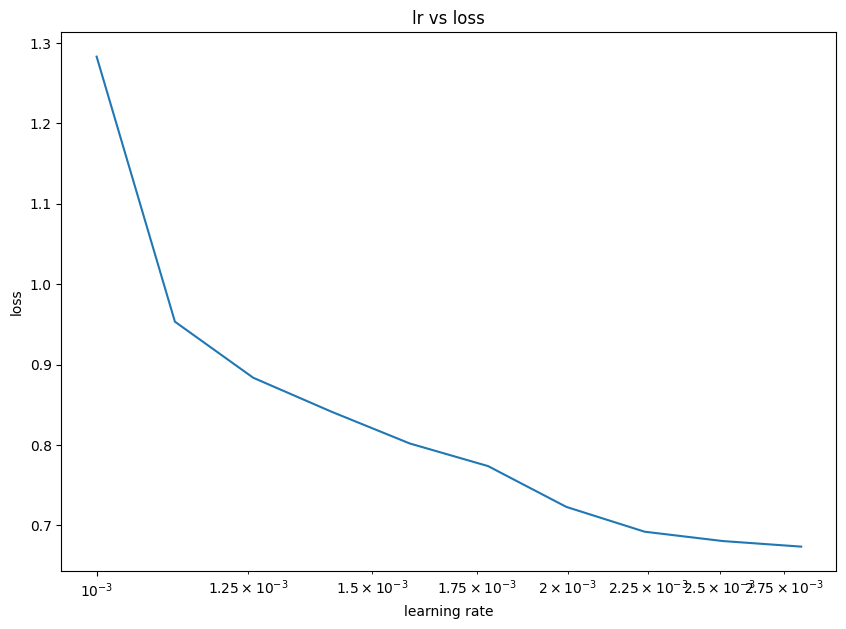

In [30]:
history_clas_model_10_df = pd.DataFrame(history_clas_model_10.history)

plt.figure(figsize=(10, 7))
plt.semilogx(history_clas_model_10_df.learning_rate, history_clas_model_10_df.loss) # instead of lrs I used learning_rate from df
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("lr vs loss")
plt.show()

This method is not ideal in my opinion. The main reason is because the learning is occurring. So in every epoch the loss function will be not the same as epoch before, so this experiment not the best. If we started to go from the biggest lr to the smallest I think that I might have see that very large learning rate is the best and then small makes the loss steady.

Anyway:
### Lets do a model with the best LR which is 1e-3

In [34]:
tf.random.set_seed(42)

classification_model_11 = models.Sequential()
classification_model_11.add(layers.Flatten(input_shape=(28,28)))
classification_model_11.add(layers.Dense(4, activation="relu"))
classification_model_11.add(layers.Dense(4, activation="relu"))
classification_model_11.add(layers.Dense(10, activation="softmax"))

classification_model_11.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
history_clas_model_11 = classification_model_11.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

/home/luxoft/TRAININGS/Tensorflow-Bootcamp/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.3318 - loss: 1.7077 - val_accuracy: 0.5748 - val_loss: 1.0049
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.6022 - loss: 0.9695 - val_accuracy: 0.6362 - val_loss: 0.9220
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.6604 - loss: 0.8946 - val_accuracy: 0.6847 - val_loss: 0.8419
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 887us/step - accuracy: 0.6998 - loss: 0.8227 - val_accuracy: 0.6977 - val_loss: 0.7998
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.7126 - loss: 0.7853 - val_accuracy: 0.7031 - val_loss: 0.7842
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.7191 - loss: 0.7667 - val_accuracy: 0.7092 - val_loss: 0.7719
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.7231 - loss: 0.7540 - val_accuracy: 0.7137 - val_loss: 0.7650
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - accuracy: 0.7263 -